In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\tomar\AppData\Local\Temp\ipykernel_14084\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

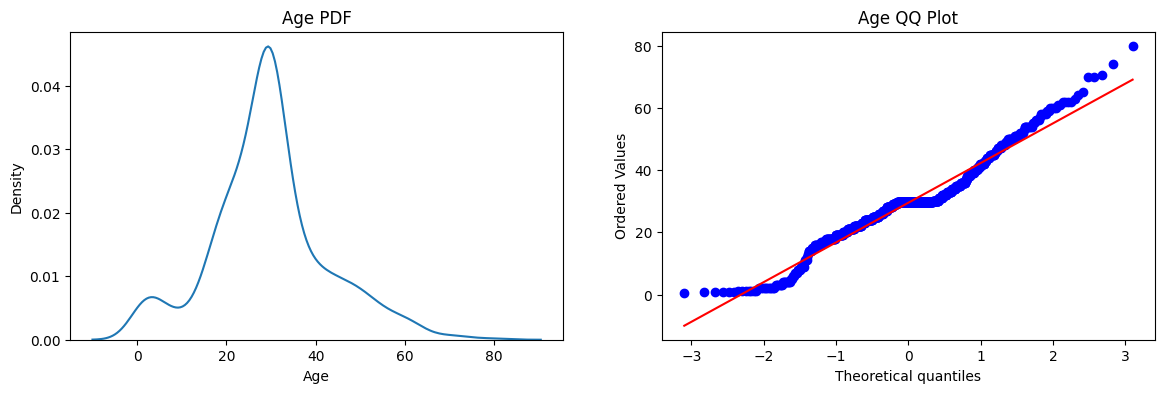

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')

plt.show

In [17]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [19]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred1=clf2.predict(x_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6871508379888268


In [20]:
trf=FunctionTransformer(func=np.log1p)

In [21]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.fit_transform(x_test)

In [22]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [23]:
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred=clf.predict(x_test)
y_pred1=clf2.predict(x_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.7374301675977654
Accuracy DT 0.5865921787709497


In [25]:
x_transformed=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6532584269662921


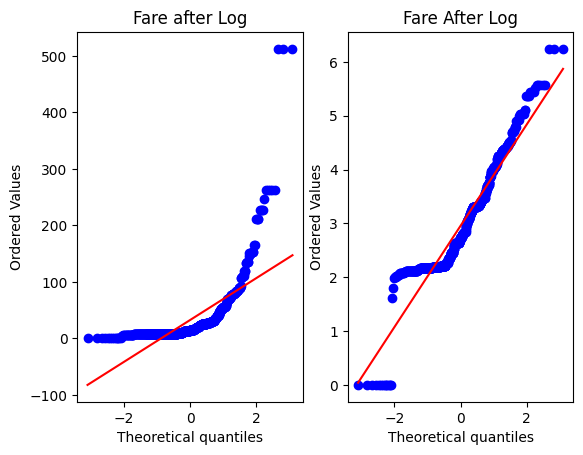

In [29]:
plt.figure(figure=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare after Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare After Log')

plt.show()

In [31]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
x_train_transformed2=trf2.fit_transform(x_train)
x_test_transformed2=trf2.fit_transform(x_test)

In [33]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred=clf.predict(x_test_transformed)
y_pred2=clf2.predict(x_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6815642458100558


In [34]:
x_transformed2=trf2.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6599875156054932


In [36]:
def apply_transform(transform):
    x=df.iloc[:,1:3]
    y=df.iloc[:,0]

    trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
    x_trans=trf.fit_transform(x)

    clf=LogisticRegression()

    print('Accuracy',np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'],dist="norm",plot=plt)
    plt.title("Fare before transform")

    plt.subplot(122)
    stats.probplot(x_trans['Fare'],dist="norm",plot=plt)
    plt.title("Fare After transform")

    plt.show()

Accuracy 0.678027465667915


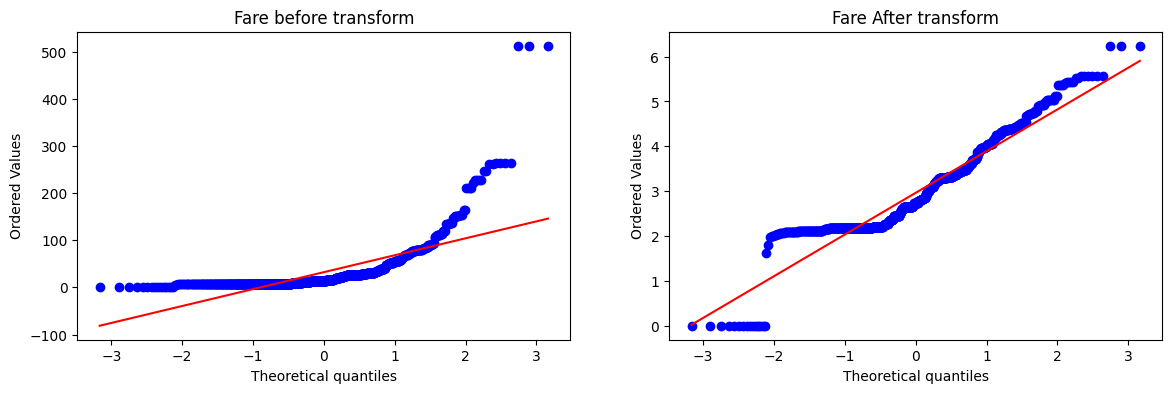

In [41]:
apply_transform(lambda x:1/x)